### Salman Rashid - DSML Batch

# Instagram Reach Analysis

In [1]:
#### Importing The Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Exploring the Dataset

df = pd.read_csv('Instagram data.csv', encoding='latin1')
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [3]:
df.tail()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
114,13700,5185,3041,5352,77,573,2,38,373,73,80,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
115,5731,1923,1368,2266,65,135,4,1,148,20,18,Clustering is a machine learning technique use...,#machinelearning #machinelearningalgorithms #d...
116,4139,1133,1538,1367,33,36,0,1,92,34,10,Clustering music genres is a task of grouping ...,#machinelearning #machinelearningalgorithms #d...
117,32695,11815,3147,17414,170,1095,2,75,549,148,214,Here are some of the best data science certifi...,#datascience #datasciencejobs #datasciencetrai...
118,36919,13473,4176,16444,2547,653,5,26,443,611,228,175 Python Projects with Source Code solved an...,#python #pythonprogramming #pythonprojects #py...


### About Dataset

Instagram generates a lot of data every day. When content creators post on Instagram, they do look at their engagement and reach to find the category of posts they should post more. Here’s the Instagram Data we collected from the account of the founder of Statso. Below are all the features in the data:

- Impressions: Number of impressions in a post (Reach)
- From Home: Reach from home
- From Hashtags: Reach from Hashtags
- From Explore: Reach from Explore
- From Other: Reach from other sources
- Saves: Number of saves
- Comments: Number of comments
- Shares: Number of shares
- Likes: Number of Likes
- Profile Visits: Numer of profile visits from the post
- Follows: Number of Follows from the post
- Caption: Caption of the post
- Hashtags: Hashtags used in the post

In [4]:
df.shape

(119, 13)

In [5]:
# Checking for duplicated values in the Dataset

duplicate = df[df.duplicated()]
duplicate.shape

(17, 13)

In [6]:
df = df.drop_duplicates()
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [7]:
df.shape

(102, 13)

In [8]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [9]:
# Checking datatypes in the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     102 non-null    int64 
 1   From Home       102 non-null    int64 
 2   From Hashtags   102 non-null    int64 
 3   From Explore    102 non-null    int64 
 4   From Other      102 non-null    int64 
 5   Saves           102 non-null    int64 
 6   Comments        102 non-null    int64 
 7   Shares          102 non-null    int64 
 8   Likes           102 non-null    int64 
 9   Profile Visits  102 non-null    int64 
 10  Follows         102 non-null    int64 
 11  Caption         102 non-null    object
 12  Hashtags        102 non-null    object
dtypes: int64(11), object(2)
memory usage: 11.2+ KB


In [10]:
df.dtypes

Impressions        int64
From Home          int64
From Hashtags      int64
From Explore       int64
From Other         int64
Saves              int64
Comments           int64
Shares             int64
Likes              int64
Profile Visits     int64
Follows            int64
Caption           object
Hashtags          object
dtype: object

In [11]:
# Checking for NULL values in the Dataset

df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [12]:
# Finding number of unique values in the Dataset

df.nunique()

Impressions       101
From Home          97
From Hashtags     100
From Explore       95
From Other         84
Saves              84
Comments           15
Shares             28
Likes              85
Profile Visits     59
Follows            29
Caption            90
Hashtags           54
dtype: int64

In [13]:
# Summary of the Dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Impressions,102.0,5920.254902,5139.888111,1941.0,3556.00,4343.5,6296.25,36919.0
From Home,102.0,2496.911765,1588.377397,1133.0,1923.75,2216.0,2605.25,13473.0
From Hashtags,102.0,1968.284314,1977.298128,116.0,753.00,1326.0,2415.75,11817.0
From Explore,102.0,1178.568627,2797.212621,0.0,178.75,337.0,728.50,17414.0
From Other,102.0,184.549020,309.096051,9.0,40.25,75.0,218.50,2547.0
Saves,102.0,156.549020,157.770332,22.0,70.50,111.0,173.50,1095.0
Comments,102.0,6.352941,3.308097,0.0,4.00,6.0,8.00,19.0
Shares,102.0,9.303922,10.150149,0.0,3.00,6.5,13.00,75.0
Likes,102.0,176.823529,85.151747,72.0,122.00,157.5,208.75,549.0
Profile Visits,102.0,54.666667,93.169954,4.0,16.00,24.0,45.75,611.0


In [14]:
# Checking the Correlation among the Dataset

df.select_dtypes('number').corr()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
Impressions,1.000000,0.850210,0.547337,0.895021,0.586628,0.791448,-0.008535,0.654920,0.852952,0.762679,0.889944
From Home,0.850210,1.000000,0.171849,0.805609,0.560149,0.786382,0.002763,0.693729,0.697192,0.537245,0.676961
From Hashtags,0.547337,0.171849,1.000000,0.177493,0.210705,0.285209,0.213391,0.211964,0.667107,0.692433,0.549309
From Explore,0.895021,0.805609,0.177493,1.000000,0.490258,0.769341,-0.152720,0.643606,0.655724,0.530046,0.795342
From Other,0.586628,0.560149,0.210705,0.490258,1.000000,0.335213,-0.081073,0.155730,0.388314,0.627791,0.537115
Saves,0.791448,0.786382,0.285209,0.769341,0.335213,1.000000,-0.003695,0.874004,0.843395,0.377424,0.647585
Comments,-0.008535,0.002763,0.213391,-0.152720,-0.081073,-0.003695,1.000000,0.012697,0.163383,0.136590,-0.029298
Shares,0.654920,0.693729,0.211964,0.643606,0.155730,0.874004,0.012697,1.000000,0.718790,0.265460,0.517278
Likes,0.852952,0.697192,0.667107,0.655724,0.388314,0.843395,0.163383,0.718790,1.000000,0.642658,0.758234
Profile Visits,0.762679,0.537245,0.692433,0.530046,0.627791,0.377424,0.136590,0.265460,0.642658,1.000000,0.852748


<Axes: >

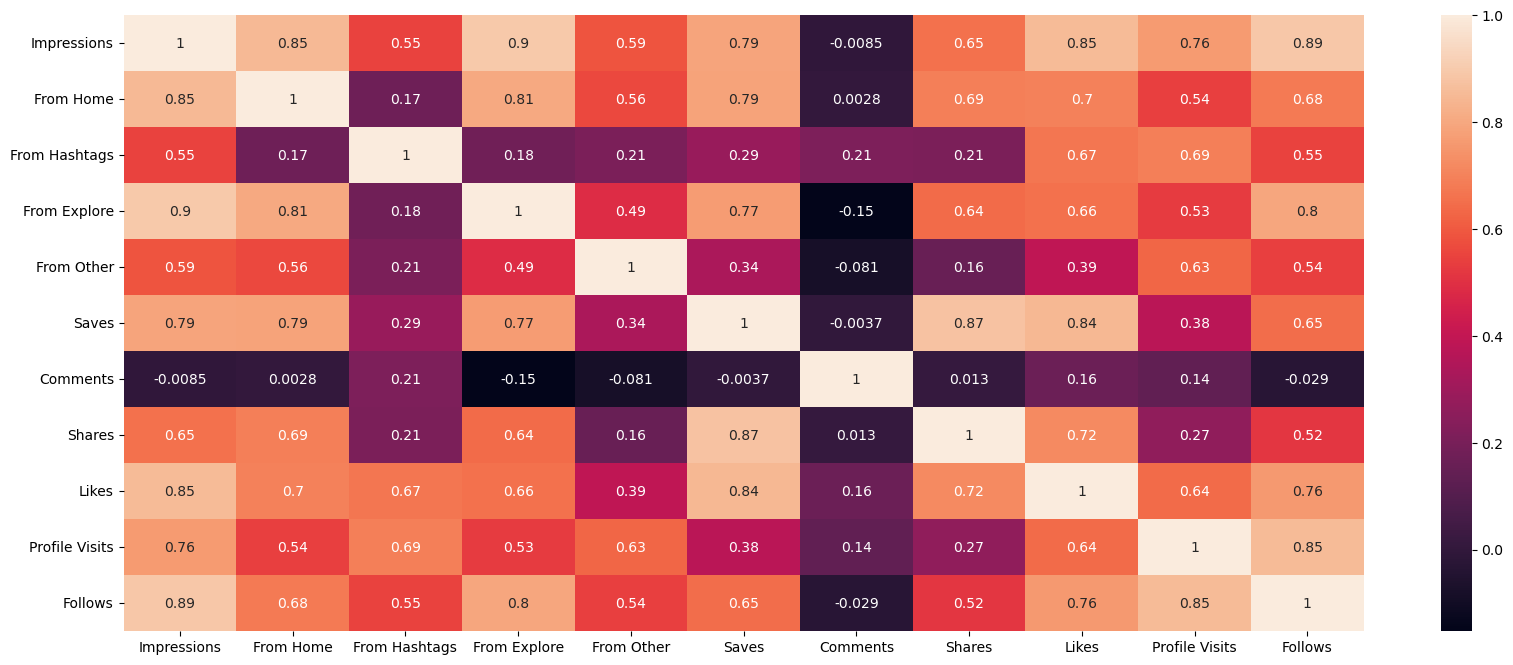

In [15]:
# Plotting the Correlation using the Heatmap

plt.figure(figsize = (20, 8))
# mask = np.triu(np.ones_like(df.select_dtypes('number').corr(), dtype=bool))
sns.heatmap(df.select_dtypes('number').corr(), annot=True)


- From the heatmap we can say that the 'comments' feature have least effect on impression
- Features like 'follows', 'likes', 'profile visits have higher correlation with the label

In [16]:
# df['Engagement Rate'] = (df['Likes'] + df['Comments'] + df['Shares']) / df['Impressions']
# df.head()

### Exploratory Data Analysis

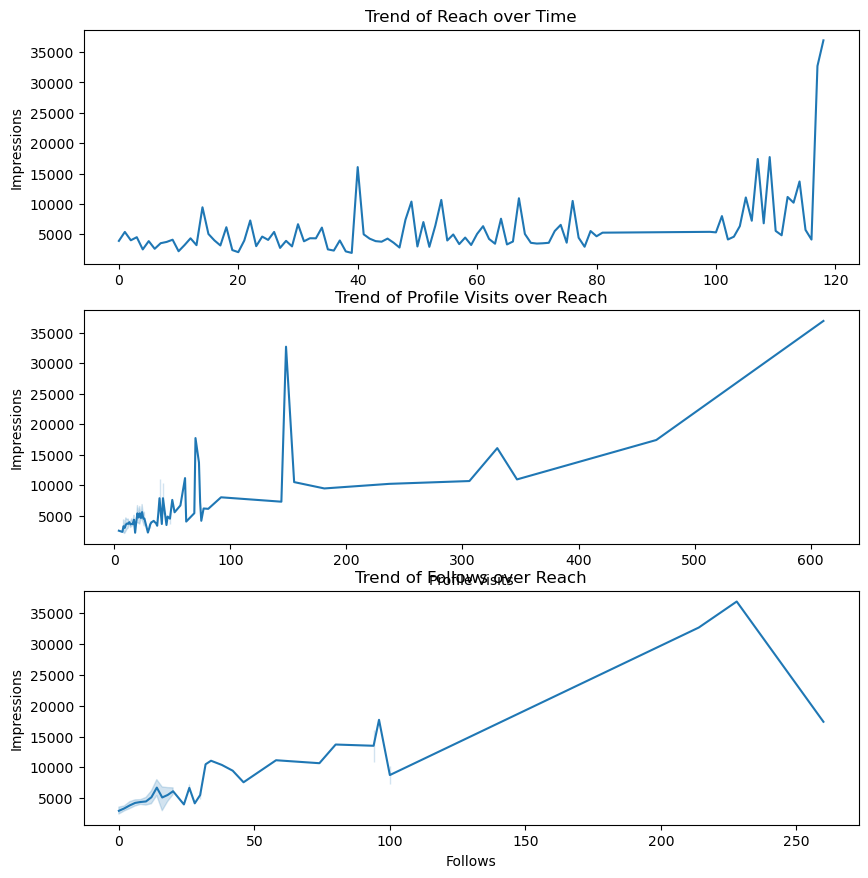

In [17]:
fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(10,5))
fig.subplots_adjust(top=1.7)
sns.lineplot(x=df.index, y=df['Impressions'], ax=axis[0])
sns.lineplot(x=df['Profile Visits'], y=df['Impressions'], ax=axis[1])
sns.lineplot(x=df['Follows'], y=df['Impressions'], ax=axis[2])

axis[0].set_title('Trend of Reach over Time')
axis[1].set_title("Trend of Profile Visits over Reach")
axis[2].set_title("Trend of Follows over Reach")
plt.show()

- We can see that the posts got more reach or impression over time. Recently the trend is sky rocketed.
- The amount of profile vists has followed a general trend of going upwards on effecting the reach of the posts.
- The trend on impression of posts based on the profile following has declined recently.

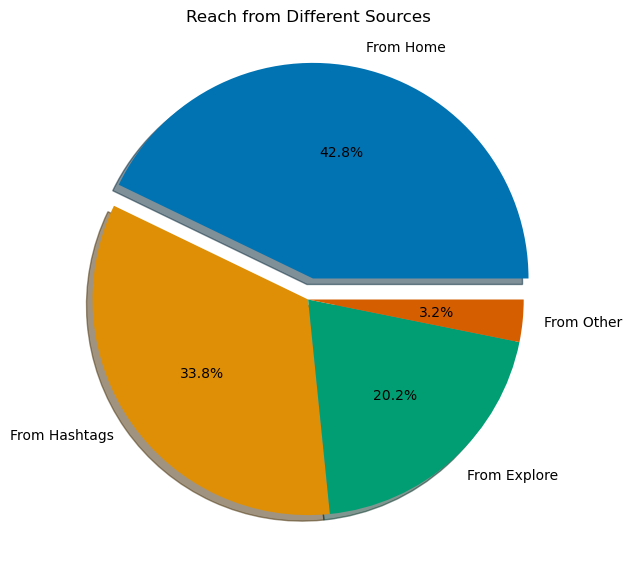

In [18]:
# Plotting Reach & Avg. Reach from the Different Sources

data = [df['From Home'].mean(), df['From Hashtags'].mean(), df['From Explore'].mean(), df['From Other'].mean()]
colors = sns.color_palette("colorblind")
label = ['From Home', 'From Hashtags', 'From Explore', 'From Other']

plt.figure(figsize=(7, 7))
plt.pie(data, labels = label, shadow=True, autopct='%1.1f%%', explode=(0.1,0,0,0), colors = colors)
plt.title('Reach from Different Sources')
plt.show()


**The posts got more reach from the home compared to other menu followed by Hastags and Explore.**

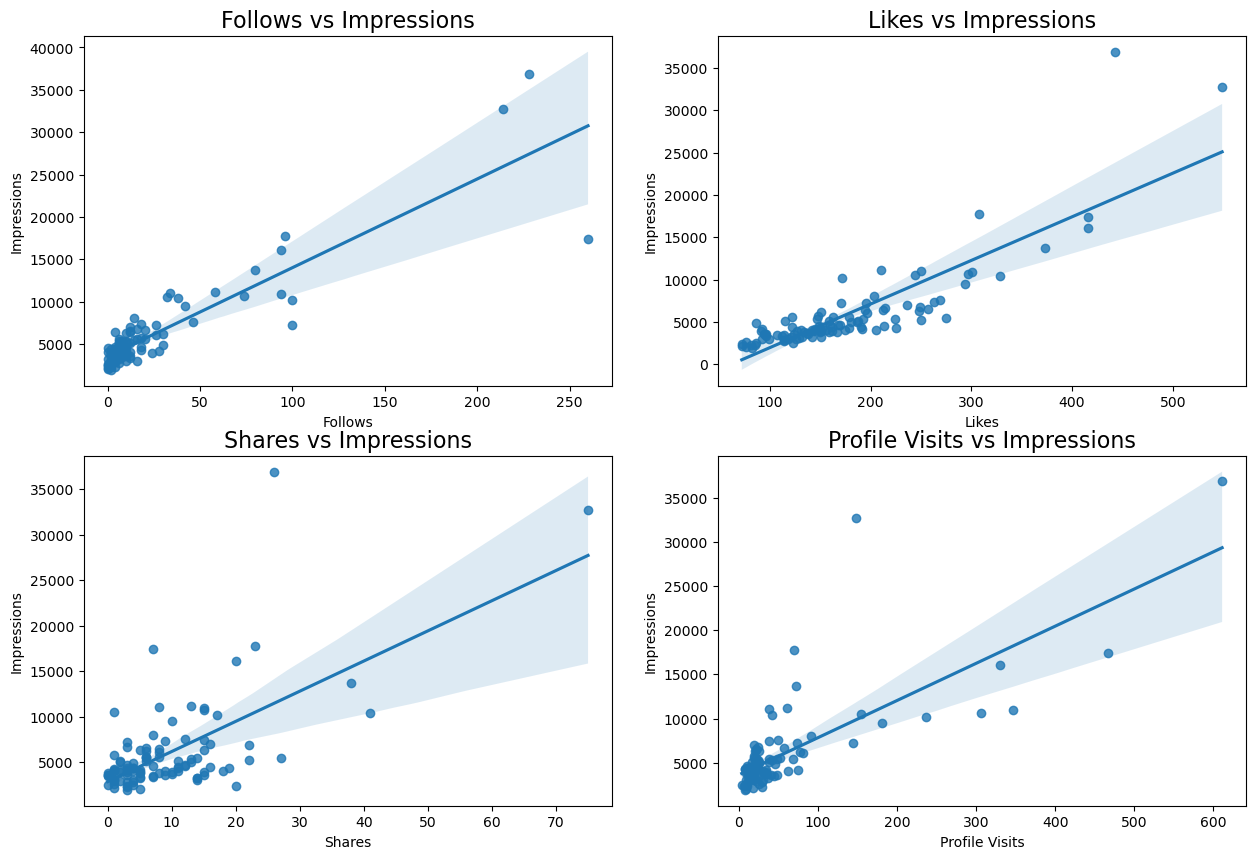

In [19]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.regplot(x='Follows', y='Impressions', data=df, fit_reg=True, ax=axis[0, 0])
sns.regplot(x='Likes', y='Impressions', data=df, fit_reg=True, ax=axis[0, 1])
sns.regplot(x='Shares', y='Impressions', data=df, fit_reg=True, ax=axis[1, 0])
sns.regplot(x='Profile Visits', y='Impressions', data=df, fit_reg=True, ax=axis[1, 1])

axis[0,0].set_title("Follows vs Impressions",fontsize=16)
axis[0,1].set_title("Likes vs Impressions", fontsize=16)
axis[1,0].set_title("Shares vs Impressions", fontsize=16)
axis[1,1].set_title("Profile Visits vs Impressions", fontsize=16)

plt.show()

**There is linear relationship between each of the columns : *Follows, Likes, Shares, Profile Visits* with respect to impression or reach of the posts**



In [20]:
# import re

# # Extract and combine all hashtags from the 'hashtags' column
# all_hashtags = ' '.join(df['Hashtags'])

# # Use regular expressions to find all unique hashtags
# unique_hashtags = set(re.findall(r'#\w+', all_hashtags))

# # Print the unique hashtags
# print(unique_hashtags)

#### Categorical Features in the Dataset

In [21]:
# Hashtags

''.join((df['Hashtags']))

'#finance\xa0#money\xa0#business\xa0#investing\xa0#investment\xa0#trading\xa0#stockmarket\xa0#data\xa0#datascience\xa0#dataanalysis\xa0#dataanalytics\xa0#datascientist\xa0#machinelearning\xa0#python\xa0#pythonprogramming\xa0#pythonprojects\xa0#pythoncode\xa0#artificialintelligence\xa0#ai\xa0#dataanalyst\xa0#amankharwal\xa0#thecleverprogrammer#healthcare\xa0#health\xa0#covid\xa0#data\xa0#datascience\xa0#dataanalysis\xa0#dataanalytics\xa0#datascientist\xa0#machinelearning\xa0#python\xa0#pythonprogramming\xa0#pythonprojects\xa0#pythoncode\xa0#artificialintelligence\xa0#ai\xa0#dataanalyst\xa0#amankharwal\xa0#thecleverprogrammer#data\xa0#datascience\xa0#dataanalysis\xa0#dataanalytics\xa0#datascientist\xa0#machinelearning\xa0#python\xa0#pythonprogramming\xa0#pythonprojects\xa0#pythoncode\xa0#artificialintelligence\xa0#ai\xa0#deeplearning\xa0#machinelearningprojects\xa0#datascienceprojects\xa0#amankharwal\xa0#thecleverprogrammer\xa0#machinelearningmodels#python\xa0#pythonprogramming\xa0#pytho

In [22]:
# Word cloud of the most used hashtags

# Combine all hashtags from the 'Hashtags' column into a single string
all_hashtags = ' '.join((df['Hashtags']).tolist())

# Split the combined string into individual hashtags
all_hashtags_list = all_hashtags.split()

# Count the unique hashtags and their occurrences
unique_hashtags_counts = pd.Series(all_hashtags_list).value_counts()

# Print the unique hashtags and their counts
unique_hashtags_counts.head(10)

#amankharwal               100
#thecleverprogrammer       100
#python                     93
#pythonprogramming          84
#pythonprojects             82
#machinelearning            81
#datascience                79
#ai                         77
#artificialintelligence     75
#data                       74
dtype: int64

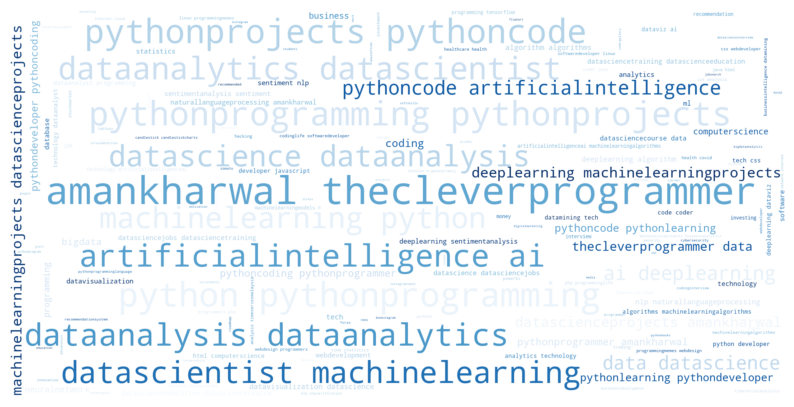

In [23]:
wordcloud = WordCloud(width=2160, height=1080,background_color='white',colormap='Blues_r').generate(all_hashtags)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**From wordcloud above we know that words like 'amankharwal', 'thecleverprogrammer', 'python' are the top three words on hashtags**

In [24]:
# Captions

''.join((df['Caption']))

"Here are some of the most important data visualizations that every Financial Data Analyst/Scientist should know.Here are some of the best data science project ideas on healthcare. If you want to become a data science professional in the healthcare domain then you must try to work on these projects.Learn how to train a machine learning model and giving inputs to your trained model to make predictions using Python.Here\x92s how you can write a Python program to detect whether a sentence is a question or not. The idea here is to find the words that we see in the beginning of a question in the beginning of a sentence.Plotting annotations while visualizing your data is considered good practice to make the graphs self-explanatory. Here is an example of how you can annotate a graph using Python.Here are some of the most important soft skills that every data scientist should have.Learn how to analyze a candlestick chart as a data scientist or a financial analyst. I hope this resource will hel

In [25]:
# Word cloud of the most used words in the comments

text = ' '.join((df['Caption']).tolist())
all_text_list = text.split()
unique_text_counts = pd.Series(all_text_list).value_counts()
unique_text_counts

the          160
of           125
to           112
data          83
you           83
            ... 
improve        1
platform.      1
Kaggle.        1
solutions      1
175            1
Length: 708, dtype: int64

In [26]:
# There are occurences of stopwords in the words list

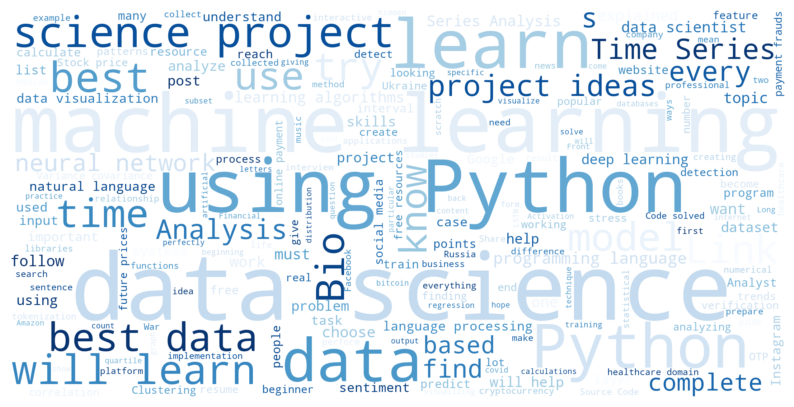

In [27]:
stopwords = set(STOPWORDS) # managing the stopwords
wordcloud = WordCloud(width=2160, height=1080, stopwords=stopwords, background_color="white", colormap='Blues').generate(text)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**From wordcloud above we can observe that words like 'Python', 'Machine learning', 'Learn' are the top three words on captions**

In [28]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

### Model Building

In [29]:
# Determining the X and y Columns

df_feat=df.drop(labels=['Impressions','Caption', 'Hashtags'],axis=1)
df_label=df['Impressions']

In [30]:
df_feat.head()

,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
0,2586,1028,619,56,98,9,5,162,35,2
1,2727,1838,1174,78,194,7,14,224,48,10
2,2085,1188,0,533,41,11,1,131,62,12
3,2700,621,932,73,172,10,7,213,23,8
4,1704,255,279,37,96,5,4,123,8,0


In [31]:
df_label.head()

0    3920
1    5394
2    4021
3    4528
4    2518
Name: Impressions, dtype: int64

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df_feat)

In [33]:
X=np.array(df_scaled)
y=np.array(df_label)

In [34]:
# Splitting the Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print('X train Shape:', X_train.shape)
print('y train Shape:', y_train.shape)
print('X test Shape:', X_test.shape)
print('y test Shape:', y_test.shape)

X train Shape: (71, 10)
y train Shape: (71,)
X test Shape: (31, 10)
y test Shape: (31,)


In [35]:
# Importing Random Forest model from scikit-learn

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
# Fiting the Model into the RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
# Making the Prediction

y_pred = model.predict(X_test)
y_pred

array([ 9972.9 ,  3764.85,  3304.55, 20354.97,  2735.9 ,  5011.39,
        3495.63,  5316.76,  6976.09,  3303.26, 12255.01,  4001.83,
        4025.78,  4711.52,  3887.87,  2864.34,  3427.44,  3517.51,
        5915.02,  4631.69,  4194.22,  3547.49, 13103.8 ,  2660.85,
        2575.93,  3547.94,  4490.82,  3006.67,  3724.42, 10702.43,
       11124.87])

In [38]:
y_pred.shape

(31,)

In [39]:
# The Mean Squared Error

mean_squared_error(y_test, y_pred)

9540367.92702258

In [40]:
# The R^Square Score

predicted = r2_score(y_test, y_pred)
print("Predicted Reach:", predicted)

Predicted Reach: 0.7726304780876919


In [41]:
# Model Feature Importance

features = model.feature_importances_
features

array([0.03891404, 0.07407088, 0.25915678, 0.0162506 , 0.04408924,
       0.00755704, 0.04313491, 0.22942211, 0.02131573, 0.26608867])

In [42]:
# Feature Importance with columns into DataFrame

feature_importance = pd.DataFrame([df_feat.columns, features])
feature_importance.columns = feature_importance.iloc[0]
feature_importance = feature_importance[1:]
feature = feature_importance.T.reset_index()
sorted_feature_importance = feature.sort_values(by=1, ascending=False)
sorted_feature_importance = sorted_feature_importance.rename(columns={0 : 'Features', 1: 'Importance'})

In [43]:
sorted_feature_importance

,Features,Importance
9,Follows,0.266089
2,From Explore,0.259157
7,Likes,0.229422
1,From Hashtags,0.074071
4,Saves,0.044089
6,Shares,0.043135
0,From Home,0.038914
8,Profile Visits,0.021316
3,From Other,0.016251
5,Comments,0.007557


**We can observe that the predicted importance of features follows the similar trend as that of the correlation coefficients**

### Conclusion
- Posts that receive more follows tend to have higher reach.
- Posts that drive saves, comments, and shares tend to reach a broader audience.
- Using relevant and popular hashtags significantly boosts post visibility.
- Analyzing content themes helps identify what resonates best with your audience.
- Posts that encourage users to visit profiles contribute positively to overall reach.
- The random forest regressor model predicted the reach with an accuracy of 78 percent.



### Recommendations

- Analyze the impact of hashtags on reach. Identify popular and relevant hashtags in your niche.
- Strategically incorporate popular hashtags into the posts.

- Focus on increasing saves, comments, and shares. Create engaging content that sparks interaction and discussions among the audience.
- Collaboration with other influencers can introduce your content to new audiences and lead to more follows.
- Explore the reach impact of different post types, such as photos and videos.
- Ensuring that the captions are relevant to the content and resonate with target audience.
- Evaluate the performance of various content themes or topics. Identify which themes resonate best with the audience.